In [1]:
import numpy as np
import pandas as pd
import requests, os
import zipfile
import seaborn as sns

In [2]:
def download(url):

	fname = os.path.basename(url)
	if os.path.exists(fname):
		print('File already exists.')
	else:
		print('Downloading', fname)
		r = requests.get(url)
		with open(fname, 'wb') as f:
			f.write(r.content)
		print('Done.')

In [3]:
def extractLines(filePath):
    f = open(filePath, "r")

    # create columns names
    res = "id,birth_year,birth_month,birth_time,birth_place,mother_age,marital_status,mother_education,"
    res += "father_age,father_education,interval_llb,cigarettes,mother_height,mother_bmi,"
    res += "pre_preg_weight,delivery_weight,pre_preg_diabetes,gest_diabetes,pre_preg_hypertension,gest_hypertension,"
    res += "prev_preterm_birth,infertility_treatment,prev_cesarian,gonorrhea,syphilis,chlamydia,hepatitis_b,hepatitis_c,"
    res += "labor_induction,labor_augmentation,steroids,antibiotics,chorioamnionitis,anesthesia,"
    res += "apgar5,apgar10,plurality,gender,infant_weight\n"

    count = 1
    i = 0
    for s in f:
        if i % 20 == 0:
            res += str(count) + ","
            res += s[8:12] + ","
            res += s[12:14] + ","
            timeOfBirth = s[18:22]
            if timeOfBirth == "9999":
                timeOfBirth = ""
            res += timeOfBirth + ","

            birthPlace = s[31]
            if birthPlace == "9":
                birthPlace = ""
            res += birthPlace + ","

            res += s[74:76] + ","
            res += s[119] + ","

            motherEducation = s[123]
            if motherEducation == "9":
                motherEducation = ""
            res += motherEducation + ","

            fatherAge = s[146:148]
            if fatherAge == "99":
                fatherAge = ""
            res += fatherAge + ","

            fatherEducation = s[162]
            if fatherEducation == "9":
                fatherEducation = ""
            res += fatherEducation + ","

            intervalLLB = s[197:200]
            if intervalLLB == "999":
                intervalLLB = ""
            res += intervalLLB + ","

            cigarettes = s[252:254]
            if cigarettes == "99":
                cigarettes = ""
            res += cigarettes + ","

            motherHeight = s[279:281]
            if motherHeight == "99":
                motherHeight = ""
            res += motherHeight + ","

            bmi = s[282:286]
            if bmi == "99.9":
                bmi = ""
            res += bmi + ","

            prePregnancyWeight = s[291:294]
            if prePregnancyWeight == "999":
                prePregnancyWeight = ""
            res += prePregnancyWeight + ","

            deliveryWeight = s[298:301]
            if deliveryWeight == "999":
                deliveryWeight = ""
            res += deliveryWeight + ","

            diabetes = s[312]
            if diabetes == "U":
                diabetes = ""
            res += diabetes + ","

            gestationalDiabetes = s[313]
            if gestationalDiabetes == "U":
                gestationalDiabetes = ""
            res += gestationalDiabetes + ","

            hypertension = s[314]
            if hypertension == "U":
                hypertension = ""
            res += hypertension + ","

            gestationalHypertension = s[315]
            if gestationalHypertension == "U":
                gestationalHypertension = ""
            res += gestationalHypertension + ","

            pretermBirths = s[317]
            if pretermBirths == "U":
                pretermBirths = ""
            res += pretermBirths + ","

            infertilityTreatment = s[324]
            if infertilityTreatment == "U":
                infertilityTreatment = ""
            res += infertilityTreatment + ","

            ceserian = s[331:333] # fixing the original code
            if ceserian == "99":
                ceserian = ""
            res += ceserian + ","

            for disease in range(342, 347):
                if s[disease] == "U":
                    res += ""
                else:
                    res += s[disease]
                res += ","

            for labor in range(382, 388):
                if s[labor] == "U":
                    res += ""
                else:
                    res += s[labor]
                res += ","

            apgar5 = s[443:445]
            if apgar5 == "99":
                apgar5 = ""
            res += apgar5 + ","

            apgar10 = s[447:449]
            if apgar10 == "99":
                apgar10 = ""
            res += apgar10 + ","

            res += s[453] + ","
            res += s[474] + ","

            #### fixing the original code ###
            infant_weight = s[503:507]
            if infant_weight == "9999":
              infant_weight = ""
            res += infant_weight + "\n"
            #################################

            count += 1

        i += 1

    f.close()
    return res

In [4]:
def get_txt_name(path: str) -> str:
  with zipfile.ZipFile(path, 'r') as zipObj:
    # Get list of files names in zip
    listOfiles = zipObj.namelist()
  return listOfiles[0]

In [5]:
def download_preprocess(year:int) -> None:
  url = f'https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat{year}us.zip'
  download(url)
  !unzip "Nat{year}us.zip"
  txt_name = get_txt_name(f"Nat{year}us.zip")
  s = extractLines(txt_name)
  with open(f"out_{year}.csv", "w") as f:
    f.write(s)


In [6]:
for year in range(2017,2022):
  download_preprocess(year)

Done.
Archive:  Nat2017us.zip
  inflating: Nat2017PublicUS.c20180516.r20180808.txt  
Done.
Archive:  Nat2018us.zip
  inflating: Nat2018PublicUS.c20190509.r20190717.txt  
Done.
Archive:  Nat2019us.zip
  inflating: Nat2019PublicUS.c20200506.r20200915.txt  
Done.
Archive:  Nat2020us.zip
  inflating: Nat2020PublicUS.c20210506.r20210812.txt  
Done.
Archive:  Nat2021us.zip
  inflating: Nat2021US.txt           


In [7]:
df = pd.DataFrame()
for year in range(2017,2022):
  df_tmp = pd.read_csv(f'out_{year}.csv', na_values=' ')
  df = pd.concat([df, df_tmp], ignore_index=True)
df

,id,birth_year,birth_month,birth_time,birth_place,mother_age,marital_status,mother_education,father_age,father_education,...,labor_augmentation,steroids,antibiotics,chorioamnionitis,anesthesia,apgar5,apgar10,plurality,gender,infant_weight
0,1,2017,1,735.0,1.0,31,1.0,5.0,33.0,4.0,...,N,N,N,N,Y,9.0,88.0,1,F,3653.0
1,2,2017,1,345.0,1.0,33,1.0,7.0,34.0,6.0,...,Y,N,N,N,Y,9.0,88.0,1,F,3500.0
2,3,2017,1,219.0,1.0,35,1.0,4.0,28.0,4.0,...,N,N,N,N,N,9.0,88.0,1,M,2340.0
3,4,2017,1,4.0,1.0,35,1.0,3.0,35.0,3.0,...,N,N,Y,N,N,9.0,88.0,1,F,3175.0
4,5,2017,1,139.0,1.0,21,2.0,3.0,25.0,3.0,...,Y,N,Y,N,Y,6.0,88.0,1,F,3050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935679,183493,2021,12,258.0,1.0,36,1.0,2.0,32.0,2.0,...,N,N,Y,N,Y,9.0,88.0,1,M,3730.0
935680,183494,2021,12,1629.0,1.0,29,2.0,NaN,28.0,NaN,...,Y,N,N,N,Y,9.0,88.0,1,M,3490.0
935681,183495,2021,12,555.0,1.0,24,1.0,4.0,32.0,2.0,...,Y,N,N,N,Y,9.0,88.0,1,F,3405.0
935682,183496,2021,12,214.0,1.0,41,2.0,7.0,25.0,3.0,...,N,N,N,N,Y,9.0,88.0,2,F,2630.0


In [96]:
df.columns

Index(['id', 'birth_year', 'birth_month', 'birth_time', 'birth_place',
       'mother_age', 'marital_status', 'mother_education', 'father_age',
       'father_education', 'interval_llb', 'cigarettes', 'mother_height',
       'mother_bmi', 'pre_preg_weight', 'delivery_weight', 'pre_preg_diabetes',
       'gest_diabetes', 'pre_preg_hypertension', 'gest_hypertension',
       'prev_preterm_birth', 'infertility_treatment', 'prev_cesarian',
       'gonorrhea', 'syphilis', 'chlamydia', 'hepatitis_b', 'hepatitis_c',
       'labor_induction', 'labor_augmentation', 'steroids', 'antibiotics',
       'chorioamnionitis', 'anesthesia', 'apgar5', 'apgar10', 'plurality',
       'gender', 'infant_weight'],
      dtype='object')

In [8]:
df['birth_place'] = pd.Categorical.from_codes(codes=df['birth_place'].fillna(0).astype(int),
                          dtype=pd.CategoricalDtype(['Unknown', 'Hospital', 'Freestanding Birth Center', 'Home (intended)',
                          'Home (not intended)', 'Home (unknown if intended)', 'Clinic / Doctor’s Office', 'Other'], ordered=False))

df['marital_status'] = pd.Categorical.from_codes(codes=df['marital_status'].fillna(0).astype(int),
                          dtype=pd.CategoricalDtype(['Unknown', 'Married', 'Unmarried'], ordered=False))

df['mother_education'] = pd.Categorical.from_codes(codes=df['mother_education'].fillna(0).astype(int),
                          dtype=pd.CategoricalDtype(['Unknown', '8th grade or less', '9th through 12th grade with no diploma',
                          'High school graduate or GED completed', 'Some college credit, but not a degree', 'Associate degree (AA,AS)', 'Bachelor’s degree (BA, AB, BS)',
                          'Master’s degree (MA, MS, MEng, MEd, MSW, MBA)', 'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)'], ordered=True))

df['father_education'] = pd.Categorical.from_codes(codes=df['father_education'].fillna(0).astype(int),
                          dtype=pd.CategoricalDtype(['Unknown', '8th grade or less', '9th through 12th grade with no diploma',
                          'High school graduate or GED completed', 'Some college credit, but not a degree', 'Associate degree (AA,AS)', 'Bachelor’s degree (BA, AB, BS)',
                          'Master’s degree (MA, MS, MEng, MEd, MSW, MBA)', 'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)'], ordered=True))

In [9]:
# add new column for not applicable and drop the coded data - for LLB and apgar10
df['interval_llb_not_applicable'] = (df['interval_llb'] == 888).map({True: 'Y', False: 'N'})
df['interval_llb'] = df['interval_llb'].where(df['interval_llb'] != 888)
df['apgar10_not_applicable'] = (df['apgar10'] == 88).map({True: 'Y', False: 'N'})
df['apgar10'] = df['apgar10'].where(df['apgar10'] != 88)


In [28]:
continues_list = ['birth_year', 'birth_month', 'birth_time',
       'mother_age', 'father_age',
       'interval_llb', 'cigarettes', 'mother_height',
       'mother_bmi', 'pre_preg_weight', 'delivery_weight',
       'prev_cesarian', 'apgar5', 'apgar10', 'plurality', 'infant_weight']
df[continues_list].describe()

,birth_year,birth_month,birth_time,mother_age,father_age,interval_llb,cigarettes,mother_height,mother_bmi,pre_preg_weight,delivery_weight,prev_cesarian,apgar5,apgar10,plurality,infant_weight
count,935684.000000,935684.000000,935579.000000,935684.000000,825927.000000,550965.000000,931341.000000,930762.000000,914929.000000,917537.000000,922821.000000,934394.000000,931847.000000,11150.000000,935684.000000,934901.000000
mean,2018.969469,6.572165,1227.482858,29.113368,31.857909,49.511374,0.998754,64.112149,27.335546,160.010245,189.291146,0.220378,8.775331,5.955874,1.033960,3256.774147
std,1.416392,3.411941,631.782788,5.805058,6.794210,38.051728,4.557609,2.842031,6.805181,42.147937,41.691714,0.587808,0.824704,2.700300,0.186379,588.782389
min,2017.000000,1.000000,0.000000,12.000000,10.000000,3.000000,0.000000,30.000000,13.000000,75.000000,100.000000,0.000000,0.000000,0.000000,1.000000,227.000000
25%,2018.000000,4.000000,758.000000,25.000000,27.000000,24.000000,0.000000,62.000000,22.300000,130.000000,160.000000,0.000000,9.000000,5.000000,1.000000,2955.000000
50%,2019.000000,7.000000,1236.000000,29.000000,32.000000,37.000000,0.000000,64.000000,25.800000,150.000000,182.000000,0.000000,9.000000,7.000000,1.000000,3295.000000
75%,2020.000000,9.000000,1732.000000,33.000000,36.000000,63.000000,0.000000,66.000000,30.900000,180.000000,211.000000,0.000000,9.000000,8.000000,1.000000,3628.000000
max,2021.000000,12.000000,2359.000000,50.000000,91.000000,300.000000,98.000000,78.000000,69.500000,375.000000,400.000000,9.000000,10.000000,10.000000,5.000000,8136.000000


In [27]:
cat_list = ['birth_place', 'marital_status', 'mother_education', 'father_education']
df[cat_list].describe()

,birth_place,marital_status,mother_education,father_education
count,935684,935684,935684,935684
unique,8,3,9,9
top,Hospital,Married,High school graduate or GED completed,High school graduate or GED completed
freq,918193,492563,240215,242924


In [26]:
bin_list = ['pre_preg_diabetes',
       'gest_diabetes', 'pre_preg_hypertension', 'gest_hypertension',
       'prev_preterm_birth', 'infertility_treatment',
       'gonorrhea', 'syphilis', 'chlamydia', 'hepatitis_b', 'hepatitis_c',
       'labor_induction', 'labor_augmentation', 'steroids', 'antibiotics',
       'chorioamnionitis', 'anesthesia', 'gender', 'interval_llb_not_applicable', 'apgar10_not_applicable']

df[bin_list].describe()

,pre_preg_diabetes,gest_diabetes,pre_preg_hypertension,gest_hypertension,prev_preterm_birth,infertility_treatment,gonorrhea,syphilis,chlamydia,hepatitis_b,hepatitis_c,labor_induction,labor_augmentation,steroids,antibiotics,chorioamnionitis,anesthesia,gender,interval_llb_not_applicable,apgar10_not_applicable
count,934658,934658,934658,934658,934658,934658,932921,932921,932921,932921,932921,934948,935084,935084,935084,935084,935084,935684,935684,935684
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,M,N,Y
freq,925508,867863,913304,862180,901129,915771,929877,931518,915762,930993,928470,663992,733609,901260,698586,920179,710548,478578,581393,920031


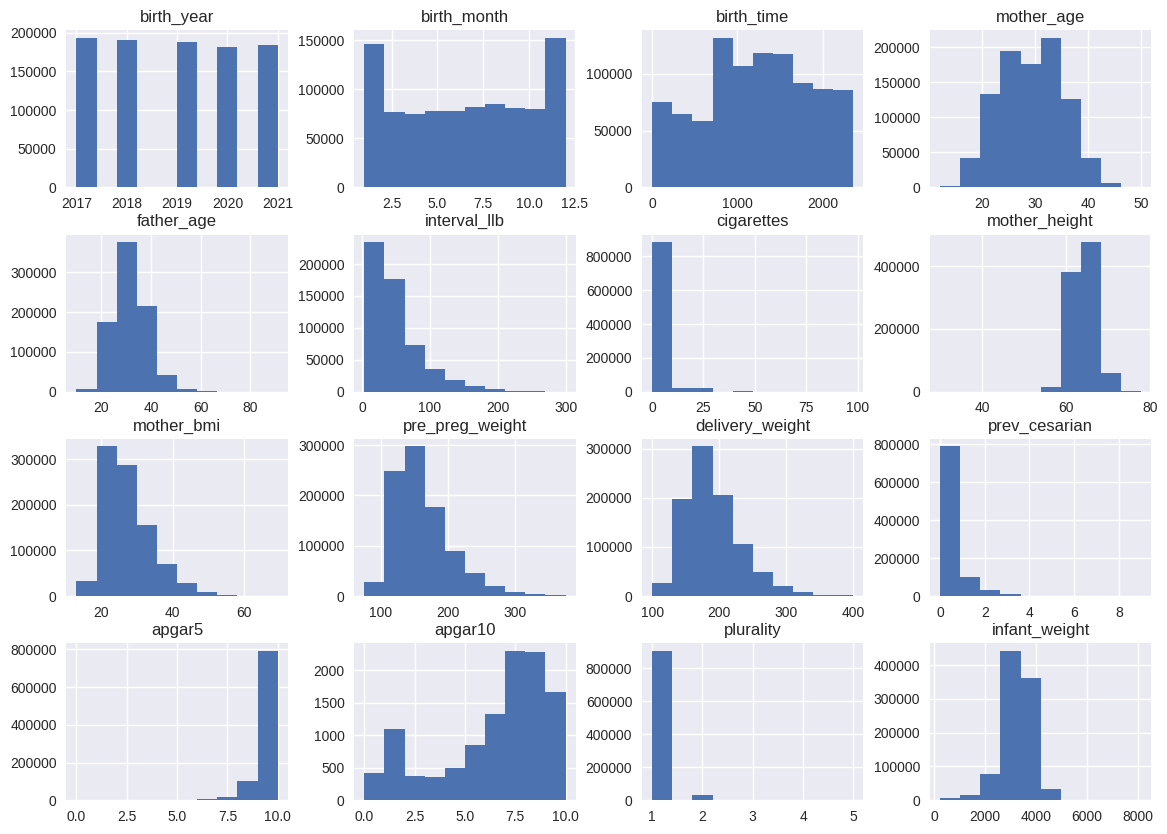

In [50]:
import matplotlib.pyplot as plt

df[continues_list].hist(figsize=[14,10])
plt.savefig('cont_hist.svg')

In [41]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=90)

<ipython-input-41-8a2a023cb32c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
<ipython-input-41-8a2a023cb32c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
<ipython-input-41-8a2a023cb32c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
<ipython-input-41-8a2a023cb32c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


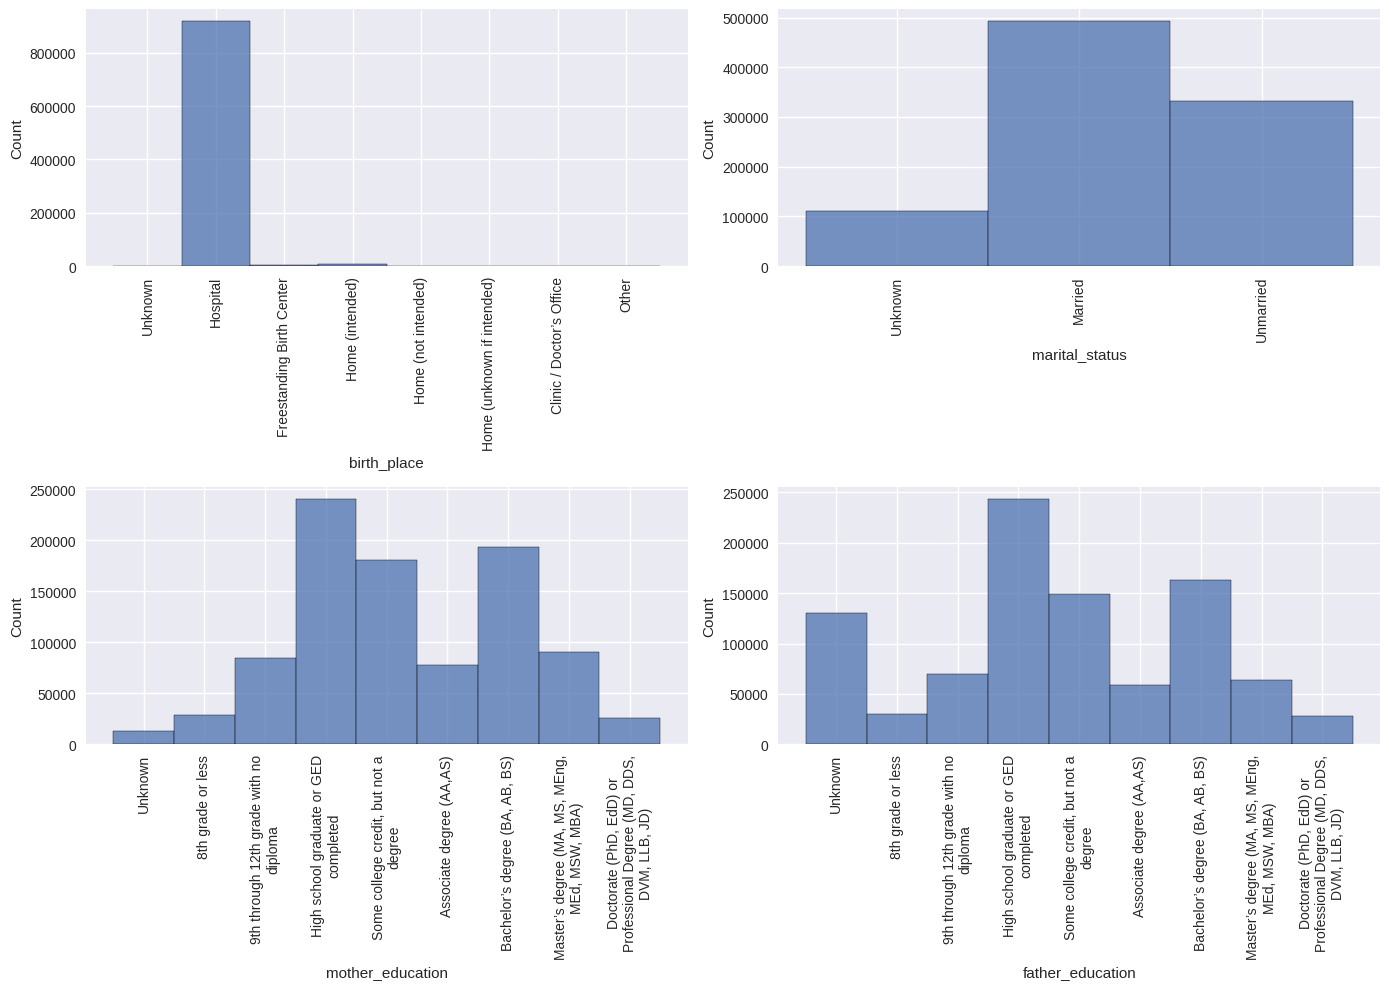

In [48]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(14, 10)

for ax, col in zip(axes, cat_list):
  sns.histplot(df[col], ax = ax)
  wrap_labels(ax, 30)
fig.tight_layout()
plt.savefig('cat_hist.svg')

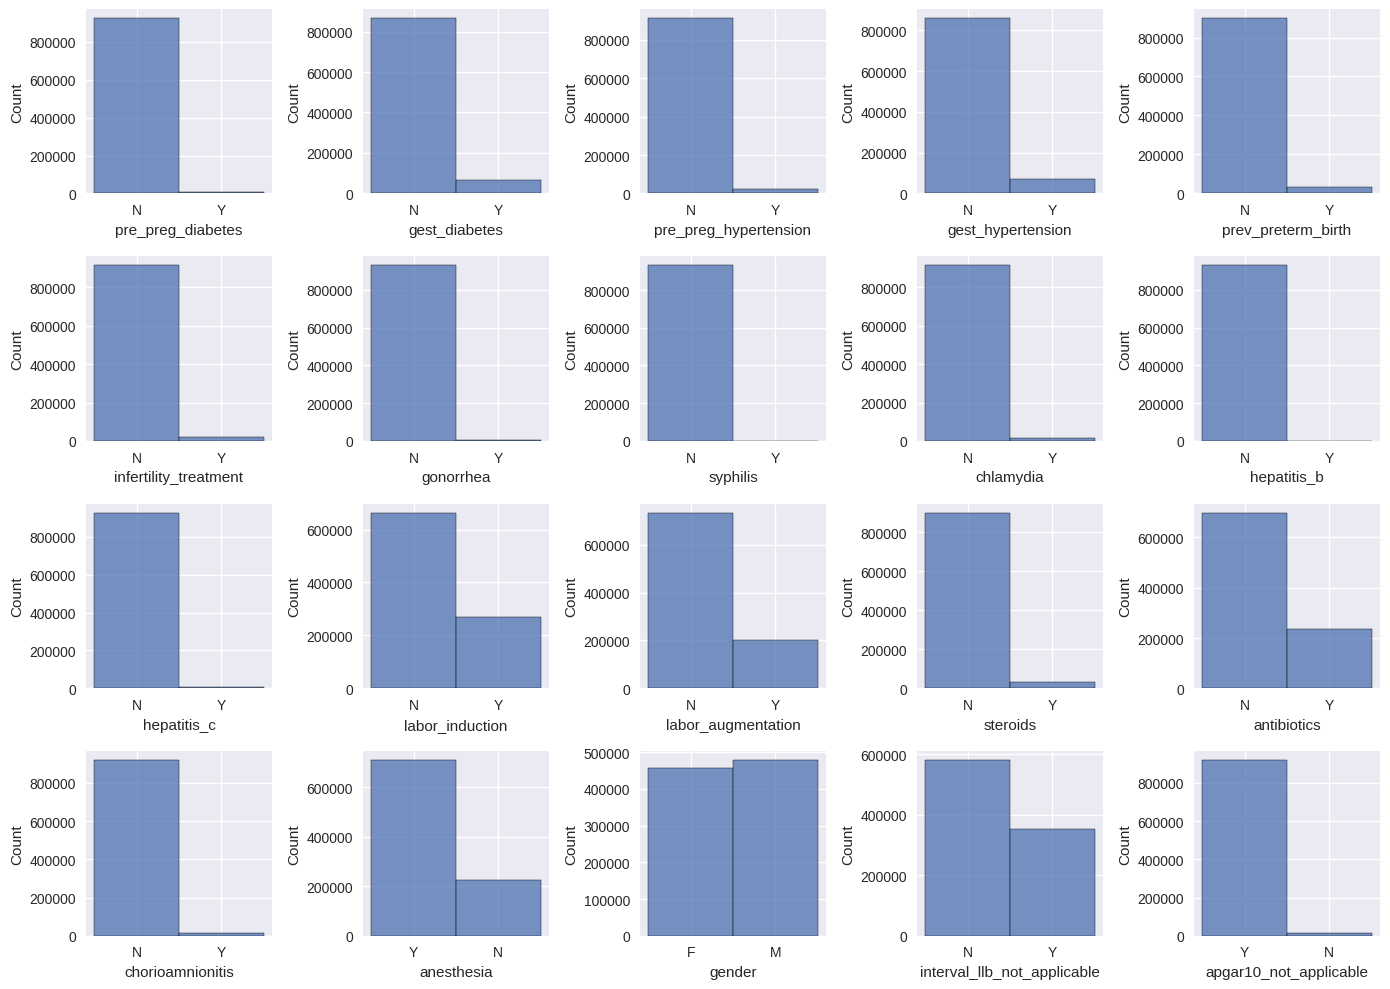

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 4, ncols = 5)
axes = axes.flatten()
fig.set_size_inches(14, 10)

for ax, col in zip(axes, bin_list):
  sns.histplot(df[col], ax = ax)
fig.tight_layout()
plt.savefig('bin_hist.svg')

<Axes: xlabel='mother_height', ylabel='Count'>

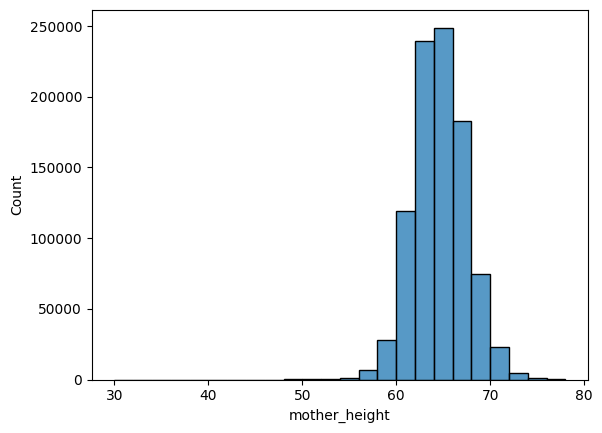

In [136]:
sns.histplot(data=df, x='mother_height', binwidth=2)

<Axes: xlabel='mother_age', ylabel='Count'>

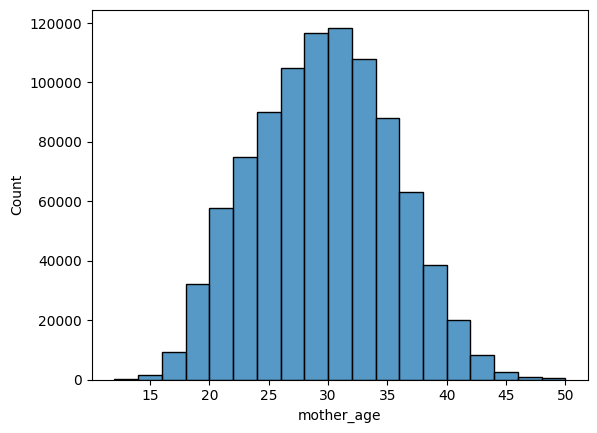

In [184]:
sns.histplot(data=df, x='mother_age', binwidth=2)

<Axes: xlabel='father_age', ylabel='Count'>

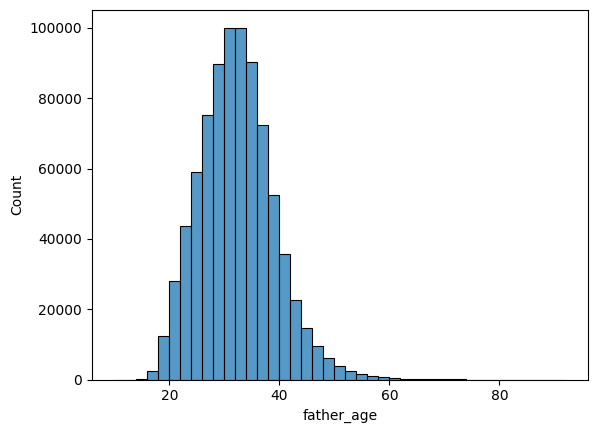

In [185]:
sns.histplot(data=df, x='father_age', binwidth=2)

<Axes: xlabel='mother_age', ylabel='father_age'>

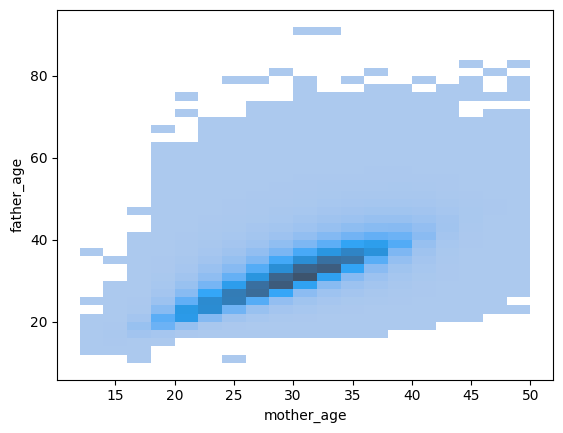

In [189]:
sns.histplot(data=df, x='mother_age' , y='father_age', binwidth=2)